In [1]:
from sklearn.model_selection import train_test_split
import csv
import numpy as np

from classifiers import *
from utils import zScoreNormalization

dataset = 'Nutt-2003-v2_BrainCancer'
# dataset = 'Singh-2002_ProstateCancer'
samples = []
results = []

print('Reading dataset...')
with open(f'../data/{dataset}.csv') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    sample_labels = next(csv_reader)[1:]
    for row in csv_reader:
        samples.append([float(x) for x in row[1:]])

# samples = zScoreNormalization(samples)
samples = np.array(samples).T
print('Total Samples:', samples.shape[0])
print('Total Features:', samples.shape[1])

pos_samples = 0
for i in range(samples.shape[0]):
    if sample_labels[i] == 'NG':
        sample_labels[i] = 0
    else:
        sample_labels[i] = 1
        pos_samples += 1
print('Positive Samples:', pos_samples)
print('Negative Samples:', samples.shape[0]-pos_samples)

# 70% training and 30% test
print('Splitting dataset into 70% training and 30% test..')
X_train, X_test, y_train, y_test = train_test_split(samples, sample_labels, test_size=0.3, random_state=109)

Reading dataset...
Total Samples: 28
Total Features: 1070
Positive Samples: 14
Negative Samples: 14
Splitting dataset into 70% training and 30% test..


1. No feature selection

In [2]:
classify(X_train, X_test, y_train, y_test, results=results)


╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 1        │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.888889 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 1        │
╘══════════════════════════════╧══════════╛


2. mRMR

In [3]:
from skfeature.function.information_theoretical_based import MRMR

num_fea = 50
idx, _, _ = MRMR.mrmr(samples, sample_labels, n_selected_features=num_fea)
_X_train = X_train[:, idx[0:num_fea]]
_X_test = X_test[:, idx[0:num_fea]]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='mRMR')

=> Features Selected: 50
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.444444 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 1        │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.444444 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.666667 │
╘══════════════════════════════╧══════════╛


3. Mutual Information (MIFS)

In [4]:
from skfeature.function.information_theoretical_based import MIFS

num_fea = 50
idx, _, _ = MIFS.mifs(samples, sample_labels, n_selected_features=num_fea)
_X_train = X_train[:, idx[0:num_fea]]
_X_test = X_test[:, idx[0:num_fea]]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Mutual Information')

=> Features Selected: 50
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.444444 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.666667 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.444444 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.444444 │
╘══════════════════════════════╧══════════╛


4. Interaction Capping (ICAP)

In [5]:
from skfeature.function.information_theoretical_based import ICAP

num_fea = 50
idx, _, _ = ICAP.icap(samples, sample_labels, n_selected_features=num_fea)
_X_train = X_train[:, idx[0:num_fea]]
_X_test = X_test[:, idx[0:num_fea]]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Interaction Capping')

=> Features Selected: 50
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.666667 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.666667 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.666667 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.444444 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.888889 │
╘══════════════════════════════╧══════════╛


5. Joint Mutual Information (JMI)

In [6]:
from skfeature.function.information_theoretical_based import JMI

num_fea = 50
idx, _, _ = JMI.jmi(samples, sample_labels, n_selected_features=num_fea)
_X_train = X_train[:, idx[0:num_fea]]
_X_test = X_test[:, idx[0:num_fea]]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Joint Mutual Information')

=> Features Selected: 50
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.666667 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 1        │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.222222 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.888889 │
╘══════════════════════════════╧══════════╛


6. Binary BAT Algorithm (BBA)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.63
Number of Features: 321
----------------------------------------

Bat 1 - Fitness: 0.63, Number of Features: 321
Bat 2 - Fitness: 0.6297196261682243, Number of Features: 322
Bat 3 - Fitness: 0.6277570093457944, Number of Features: 329
Bat 4 - Fitness: 0.6269158878504673, Number of Features: 332
Bat 5 - Fitness: 0.6263551401869158, Number of Features: 334
Bat 6 - Fitness: 0.6260747663551403, Number of Features: 335
Bat 7 - Fitness: 0.6257943925233644, Number of Features: 336
Bat 8 - Fitness: 0.6249532710280374, Number of Features: 339
Bat 9 - Fitness: 0.6246728971962616, Number of Features: 340
Bat 10 - Fitness: 0.624392523364486, Number of Features: 341
Bat 11 - Fitness: 0.6238317757009346, Number of Features: 343
Bat 12 - Fitness: 0.6235514018691589, Number of Features: 344
Bat 13 - Fitness: 0.6221495327102804, Number of Features: 349
Bat 14 - Fitness: 0.62158878504

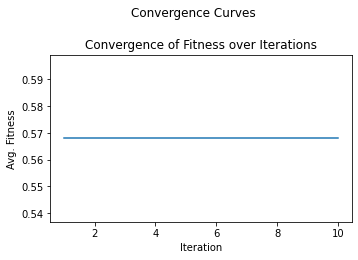

=> Features Selected: 321
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 1        │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.888889 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.666667 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.444444 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 1        │
╘══════════════════════════════╧══════════╛


/Users/siddhantnaik17/PycharmProjects/GeneDiseaseAssociation/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [7]:
from Py_FS.wrapper.nature_inspired import BBA

sol = BBA(150, 10, samples, sample_labels, weight_acc=0.7, val_size=10)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Binary BAT Algorithm')

7. Mayfly Algorithm (MA)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.6920560747663551
Number of Features: 599
----------------------------------------

Mayfly 1 - Fitness: 0.6920560747663551, Number of Features: 599
Mayfly 2 - Fitness: 0.6920560747663551, Number of Features: 599
Mayfly 3 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 4 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 5 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 6 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 7 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 8 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 9 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 10 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 11 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 12 - Fitness: 0.6606542056074766, Number of Features: 711
Mayfly 13 - Fitness: 0.66065

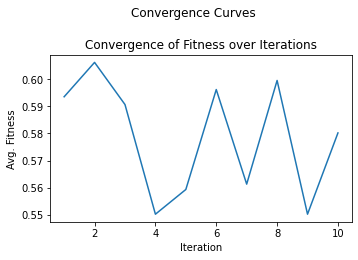

=> Features Selected: 764
╒══════════════════════════════╤══════════╕
│ SVM                          │ 1        │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.666667 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.888889 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 1        │
╘══════════════════════════════╧══════════╛


In [8]:
from Py_FS.wrapper.nature_inspired import MA

sol = MA(150, 10, samples, sample_labels, weight_acc=0.7, val_size=10)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Mafly Algorithm')

8. Particle Swarm Optimization (PSO)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.8192523364485982
Number of Features: 395
----------------------------------------

Particle 1 - Fitness: 0.8192523364485982, Number of Features: 395
Particle 2 - Fitness: 0.8186915887850468, Number of Features: 397
Particle 3 - Fitness: 0.8178504672897197, Number of Features: 400
Particle 4 - Fitness: 0.8172897196261683, Number of Features: 402
Particle 5 - Fitness: 0.8153271028037383, Number of Features: 409
Particle 6 - Fitness: 0.8122429906542057, Number of Features: 420
Particle 7 - Fitness: 0.8088785046728972, Number of Features: 432
Particle 8 - Fitness: 0.8083177570093458, Number of Features: 434
Particle 9 - Fitness: 0.8077570093457944, Number of Features: 436
Particle 10 - Fitness: 0.8066355140186916, Number of Features: 440
Particle 11 - Fitness: 0.8060747663551402, Number of Features: 442
Particle 12 - Fitness: 0.8055140186915888, Number of Features: 444
Part

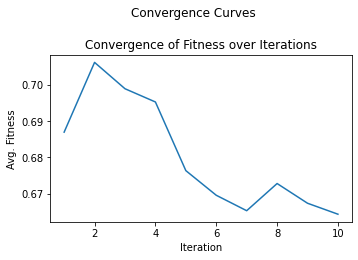

=> Features Selected: 377
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.666667 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.888889 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.111111 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 1        │
╘══════════════════════════════╧══════════╛


In [9]:
from Py_FS.wrapper.nature_inspired import PSO

sol = PSO(150, 10, samples, sample_labels, weight_acc=0.7, val_size=10)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Particle Swarm Optimization')

9. Grey Wolf Optimizer (GWO)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.6254205607476635
Number of Features: 587
----------------------------------------

Greywolf 1 - Fitness: 0.6254205607476635, Number of Features: 587
Greywolf 2 - Fitness: 0.624018691588785, Number of Features: 592
Greywolf 3 - Fitness: 0.6231775700934579, Number of Features: 595
Greywolf 4 - Fitness: 0.6228971962616822, Number of Features: 596
Greywolf 5 - Fitness: 0.6226168224299065, Number of Features: 597
Greywolf 6 - Fitness: 0.622056074766355, Number of Features: 599
Greywolf 7 - Fitness: 0.6217757009345795, Number of Features: 600
Greywolf 8 - Fitness: 0.6214953271028036, Number of Features: 601
Greywolf 9 - Fitness: 0.6214953271028036, Number of Features: 601
Greywolf 10 - Fitness: 0.6206542056074766, Number of Features: 604
Greywolf 11 - Fitness: 0.6198130841121495, Number of Features: 607
Greywolf 12 - Fitness: 0.6195327102803738, Number of Features: 608
Greywo

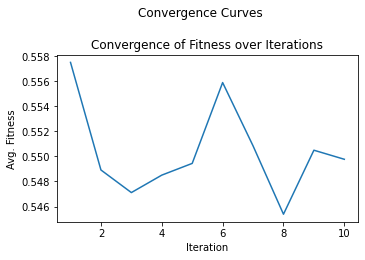

=> Features Selected: 347
╒══════════════════════════════╤══════════╕
│ SVM                          │ 1        │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 1        │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.888889 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.666667 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.888889 │
╘══════════════════════════════╧══════════╛


In [10]:
from Py_FS.wrapper.nature_inspired import GWO

sol = GWO(150, 10, samples, sample_labels, weight_acc=0.7, val_size=10)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Grey Wolf Optimiser')

10. Harmony Search (HS)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.7610280373831776
Number of Features: 353
----------------------------------------

Harmony 1 - Fitness: 0.7610280373831776, Number of Features: 353
Harmony 2 - Fitness: 0.6974766355140186, Number of Features: 330
Harmony 3 - Fitness: 0.6957943925233645, Number of Features: 336
Harmony 4 - Fitness: 0.6955140186915887, Number of Features: 337
Harmony 5 - Fitness: 0.6918691588785046, Number of Features: 350
Harmony 6 - Fitness: 0.6879439252336448, Number of Features: 364
Harmony 7 - Fitness: 0.6817757009345794, Number of Features: 386
Harmony 8 - Fitness: 0.6778504672897195, Number of Features: 400
Harmony 9 - Fitness: 0.6758878504672897, Number of Features: 407
Harmony 10 - Fitness: 0.6758878504672897, Number of Features: 407
Harmony 11 - Fitness: 0.6680373831775701, Number of Features: 435
Harmony 12 - Fitness: 0.6674766355140187, Number of Features: 437
Harmony 13 - Fit

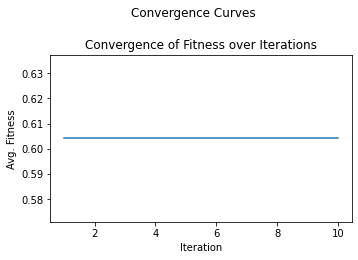

=> Features Selected: 353
╒══════════════════════════════╤══════════╕
│ SVM                          │ 1        │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.777778 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 1        │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 1        │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.555556 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.888889 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.888889 │
╘══════════════════════════════╧══════════╛


/Users/siddhantnaik17/PycharmProjects/GeneDiseaseAssociation/.venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [11]:
from Py_FS.wrapper.nature_inspired import HS

sol = HS(150, 10, samples, sample_labels, weight_acc=0.7, val_size=10)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Harmony Search')

### Final Result

In [12]:
print(tabulate(
    results,
    tablefmt='fancy_grid',
    headers=[
        'Feature Selection',
        'SVM',
        'Decision Tree',
        'Extra Trees',
        'Linear DA',
        'kNN',
        'GaussianNB',
        'MLP',
        'Random Forest'
    ]
))

╒═════════════════════════════╤══════════╤═════════════════╤═══════════════╤═════════════╤══════════╤══════════════╤══════════╤═════════════════╕
│ Feature Selection           │      SVM │   Decision Tree │   Extra Trees │   Linear DA │      kNN │   GaussianNB │      MLP │   Random Forest │
╞═════════════════════════════╪══════════╪═════════════════╪═══════════════╪═════════════╪══════════╪══════════════╪══════════╪═════════════════╡
│ None                        │ 0.888889 │        0.777778 │      1        │    0.888889 │ 0.555556 │     0.888889 │ 0.555556 │        1        │
├─────────────────────────────┼──────────┼─────────────────┼───────────────┼─────────────┼──────────┼──────────────┼──────────┼─────────────────┤
│ mRMR                        │ 0.777778 │        0.444444 │      0.777778 │    1        │ 0.444444 │     0.777778 │ 0.555556 │        0.666667 │
├─────────────────────────────┼──────────┼─────────────────┼───────────────┼─────────────┼──────────┼──────────────┼────────